In [1]:
from pylab import * #importing several functions from pylab, including numpy and pyplot

import numpy as np
import math
from math import pi
from numpy.lib import scimath as SM
from scipy.interpolate import interp1d
import warnings 
warnings.filterwarnings('ignore')
from scipy.integrate import simps

from mpmath import quad, mp #for interpolation section
mp.dps = 15; mp.pretty = True #integration after interpolation




def SD_Test(noise,dt):
    #we are assuming an input Noise of 2D with dimensions 1: reals and 2: N:= total_time/dt + 1
    #k = 8.6173303E-5 #boltzmann constant in eV/K
    k =0.6950389 # in cm^-1. Change made on 8th of April
    T = 300 #Temperature in K
    hbar = 0.658211951 # in eV-fs
    
    
    N = len(noise[0,:])
    reals = len(noise[:,0])
    
    #Paper Method Autocorrelation function 
    def autocorrelation(noise,i): #matrix implementation of the autocorrelation calculation. 
        cor1=noise[:,:N-i]
        cor2=noise[:,i:]
        res=cor1*cor2
        C=np.mean(res,axis=1)
        return C #returns the Calculation for a certain noise matrix, and index i, i.e. C(t_i). Since it is a matrix, this is the ith-column of the total autocorrelation matrix

    def Ccalc(noise):
        C = np.zeros((reals,N))
        for i in range(N):#Calculating the autocorrelation for the whole matrix. Rows: realizations, Columns: different i's
            C[:,i] = autocorrelation(noise,i)
        return C # matrix with size reals x N

    #Calculate expectation value
    def expval(noise):
        summation = Ccalc(noise) #Matrix with size reals x N. each row contains C(t)_i for eachh realization i 
        return np.mean(summation,axis=0) #calculating the mean over the different realizations
    
    
    
    #Calculation of autocorrelation
    print('Calculating Autocorrelation')
    C = expval(noise) #autocorrelation array, len = N, with dt, gamma and strength
    auto = C[:N//2] #only trusting half the values employed
    N_cut = len(auto) #N/2

    #Calculation of spectral density
    dw_t = 2*pi/(2*N_cut*dt) #creating dw in units of 1/fs. denominator: 2*N_cut = N
    w_t = np.arange(0,N_cut*dw_t,dw_t) #array of frequencies to use in 1/fs. Max frequency is not necessarily this. Only ought to be less than nyquist frequency: dw*N/2
    x_axis = hbar*w_t # x-axis on the graph from paper  jcp12
    t_cut = arange(0,dt*N_cut,dt) #creating time array for integration
    tmax = t_cut[-1] #This value is needed because it should be the limit for the integration
    print('Interpolation going on')
    autofunc = interp1d(t_cut,auto,kind="cubic", assume_sorted = True) #generating a function from the interpolation of of t_cut and auto
    print('Integration going on')
    def new_int(w):
        def f(t):
            return autofunc(float(t))*cos(w*float(t)) #cosine transformm == integration of autocorrelation
        return quad(f, linspace(0,tmax,10))*w/(pi*k*T) #J(w) on jcp13 #integration range dividided in 20 equidistant intervals
        #return quad(f, [0,tmax])*w/(pi*k*T) #implemented only for Drude because is taking way too
    new_int_vec = vectorize(new_int) #vectorizing to obtain array for the different frequencies
    J_new = new_int_vec(w_t) #final J(w). Check for high frequencies, it might oscillatte
    print('Finished')
    return J_new, x_axis
    #return C

# drude noise to compare with Hannes: JCP12 fig 2

# drude noise for thesis

In [25]:
#Test for different drudes to generate a nice plot
from Drude_noise import noise_algorithm
T=300
Er= 50 #lambda for me
cortim=25
total_time=20000
step= 0.1
reps = 50
M=1
total_time = 400

In [12]:
NoiseD1 = noise_algorithm(total_time,reps,M,step,cortim,Er)
J_D_1,x_D_1 = SD_Test(NoiseD1[:,:,0],step)

(50, 4001)
(50, 4001, 1)
0
(50, 4001)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on


In [13]:
NoiseD2 = noise_algorithm(total_time,200,M,step,cortim,Er)
J_D_2,x_D_2 = SD_Test(NoiseD2[:,:,0],step)

(200, 4001)
(200, 4001, 1)
0
(200, 4001)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on


In [27]:
NoiseD3 = noise_algorithm(total_time,1000,M,step,cortim,Er)
J_D_3,x_D_3 = SD_Test(NoiseD3[:,:,0],step)

(1000, 4001)
(1000, 4001, 1)
0
(1000, 4001)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on
Finished


In [28]:
NoiseD5 = noise_algorithm(total_time,5000,M,step,cortim,Er)
J_D_5,x_D_5 = SD_Test(NoiseD5[:,:,0],step)

(5000, 4001)
(5000, 4001, 1)
0
(5000, 4001)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on
Finished


In [29]:
NoiseD6 = noise_algorithm(total_time,5000,M,1,cortim,Er)
J_D_6,x_D_6 = SD_Test(NoiseD6[:,:,0],1)

(5000, 401)
(5000, 401, 1)
0
(5000, 401)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on
Finished


In [30]:
NoiseD7 = noise_algorithm(total_time,5000,M,2,cortim,Er)
J_D_7,x_D_7 = SD_Test(NoiseD7[:,:,0],2)

(5000, 201)
(5000, 201, 1)
0
(5000, 201)
Finished algorithm properly
Calculating Autocorrelation
Interpolation going on
Integration going on
Finished


In [31]:

np.save('J_D_1',J_D_1)
np.save('X_D_1',x_D_1)

np.save('J_D_2',J_D_2)
np.save('X_D_2',x_D_2)

np.save('J_D_3',J_D_3)
np.save('X_D_3',x_D_3)

np.save('J_D_5',J_D_5)
np.save('X_D_5',x_D_5)

np.save('J_D_6',J_D_6)
np.save('X_D_6',x_D_6)

np.save('J_D_7',J_D_7)
np.save('X_D_7',x_D_7)

In [ ]:
NoiseD1 = noise_algorithm(total_time,reps,M,step,cortim,Er)
J_D_1,x_D_1 = SD_Test(NoiseD1[:,:,0],step)

In [57]:
Noise = load('Tests_1.npy')
J1,x1 = SD_Test(Noise,0.5)

Interpolation going on
Integration going on


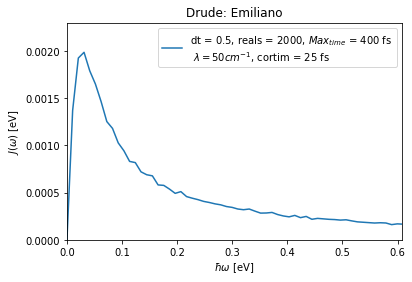

In [58]:
figure()
title('Drude: Emiliano')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [eV]')
xlim(0, 0.4/hbar)
ylim(0,0.0023)
plot(x1,J1,label='dt = 0.5, reals = 2000, $Max_{time}$ = 400 fs \n $\lambda = 50 cm^{-1}$, cortim = 25 fs')
legend()
#savefig('1.jpg')
show()

In [3]:
factor = (1.23984E-4)
#k = 8.6173303E-5 #boltzmann constant in eV/K
k =0.6950389 # in cm^-1. Change made on 8th of April
T = 300 #Temperature in K
hbar = 0.658211951 # in eV-fs

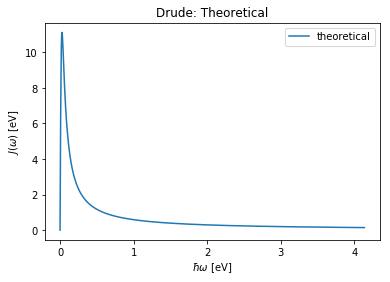

In [27]:
#created this set of parameters because this is the theoretical, does not really matter what omegas we use
w = np.linspace(0,2*pi,1000)
x_theoretical = 0.658211951*w #hbar*w
gamma = 1/25
#strength = 1.23984E-4 *35
#strength = 35/factor #cm^-1/(ev/cm^-1)
strength = 35 #cm^-1 w/o factor dividing (as it should be)
J_theoretical = 2*gamma*strength*w/(pi*(w**2+gamma**2)) 
figure()
title('Drude: Theoretical')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [eV]')
#xlim(0, 0.4/hbar)
#ylim(0,0.0023)
plot(x_theoretical,J_theoretical,label='theoretical')
legend()
savefig('theo_c.jpg',bbox_inches='tight')
show()


(100, 4, 1001)
(100, 1001, 4)


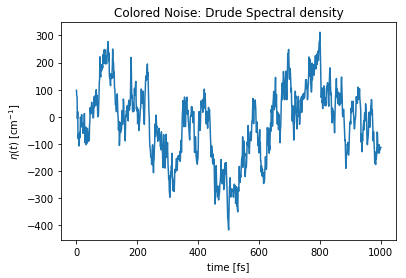

In [6]:
Noise2 = load('Tests_2.npy')
print(shape(Noise2))
Noise2 = np.swapaxes(Noise2,1,2)
print(shape(Noise2))

figure()
plot(Noise2[0,:,0])
title('Colored Noise: Drude Spectral density')
xlabel('time [fs]')
ylabel('$\eta(t)$ [cm$^{-1}$]')
show()
#J2,x2 = SD_Test(Noise2[:,:,0],1)

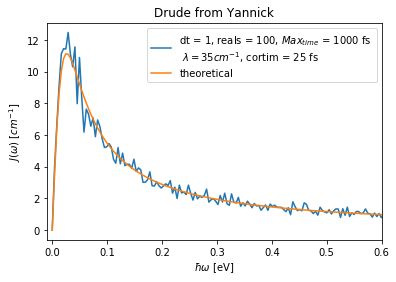

In [28]:
figure()
title('Drude from Yannick')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(0,0.0023)
xlim(-0.01, 0.6)
plot(x2,J2,label='dt = 1, reals = 100, $Max_{time}$ = 1000 fs \n $\lambda = 35 cm^{-1}$, cortim = 25 fs')
plot(x_theoretical,J_theoretical,label='theoretical')
legend()
#savefig('Drude_2_c.jpg',bbox_inches='tight')
show()

(100, 1001, 4)


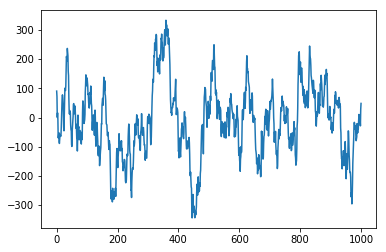

Interpolation going on
Integration going on


In [23]:
Noise3 = load('Tests_3.npy')
print(shape(Noise3))
figure()
plot(Noise3[0,:,0]/factor)
show()
J3,x3 = SD_Test(Noise3[:,:,0]/factor,1)

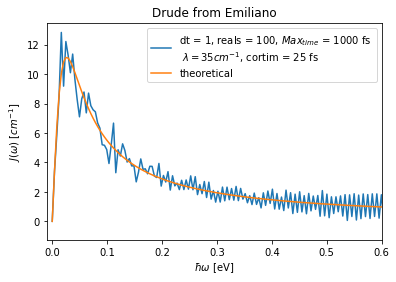

In [29]:
figure()
title('Drude from Emiliano')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
xlim(-0.01, 0.6)
#ylim(0,0.0023)
plot(x3,J3,label='dt = 1, reals = 100, $Max_{time}$ = 1000 fs \n $\lambda = 35 cm^{-1}$, cortim = 25 fs')
plot(x_theoretical,J_theoretical,label='theoretical')
legend()
#savefig('Drude_3_c.jpg',bbox_inches='tight')
show()

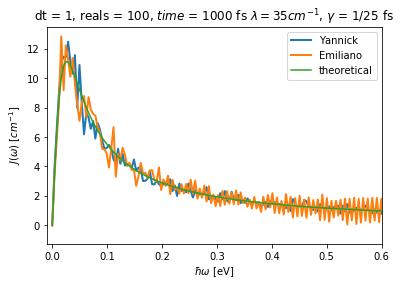

In [30]:

figure()
title('dt = 1, reals = 100, $time$ = 1000 fs $\lambda = 35 cm^{-1}$, $\gamma$ = 1/25 fs')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
xlim(-0.01, 0.6)
#ylim(0,0.0023)
plot(x2,J2,markersize=2,linewidth=2,label='Yannick')
plot(x3,J3,markersize=2,linewidth=2,label='Emiliano')
plot(x_theoretical,J_theoretical,label='theoretical')
legend()
#savefig('Comparison_c.jpg',bbox_inches='tight')
show()

(100, 1001, 4)


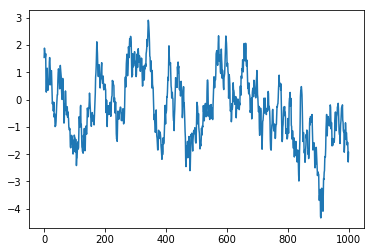

In [82]:
#checking the noise of tests_4: generated using the drude_noise using strenght only in cm with strength = strength_cm
Noise4 = load('Tests_4.npy')
print(shape(Noise4))
figure()
plot(Noise4[0,:,0])
show()

(100, 1001, 4)


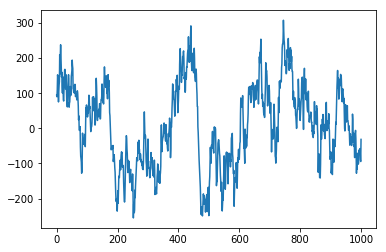

In [84]:
#checking the noise of tests_5: generated using the drude_noise using strenght in cm with strength = strength_cm and changing kv to [cm-1]
Noise5 = load('Tests_5.npy')
print(shape(Noise5))
figure()
plot(Noise5[0,:,0])
show()

(1000, 4, 1001)
(1000, 1001, 4)


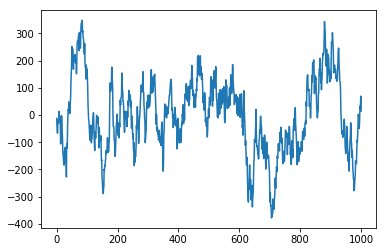

Interpolation going on
Integration going on
(1000, 1001, 4)


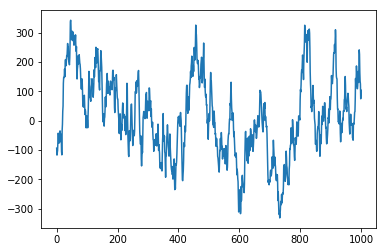

Interpolation going on
Integration going on


In [6]:
#loading mine and Yannicks noise with 1000 realizations
NoiseY = load('Tests_Y1000.npy')
print(shape(NoiseY))
NoiseY = np.swapaxes(NoiseY,1,2)
print(shape(NoiseY))
figure()
plot(NoiseY[0,:,0])
show()
JY,xY = SD_Test(NoiseY[:,:,0],1)

NoiseE = load('Tests_E1000.npy')
print(shape(NoiseE))
figure()
plot(NoiseE[0,:,0])
show()
JE,xE = SD_Test(NoiseE[:,:,0],1)

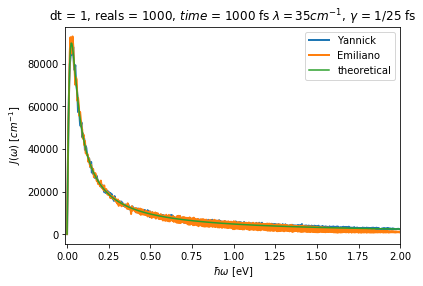

In [18]:
figure()
title('dt = 1, reals = 1000, $time$ = 1000 fs $\lambda = 35 cm^{-1}$, $\gamma$ = 1/25 fs')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
xlim(-0.01, 2.0)
#ylim(0,20000)
plot(xY,JY,markersize=2,linewidth=2,label='Yannick')
plot(xE,JE,markersize=2,linewidth=2,label='Emiliano')
plot(x_theoretical,J_theoretical,label='theoretical')
legend()
savefig('Comparison_1000_3.jpg',bbox_inches='tight')
show()

(1000, 1001, 2)


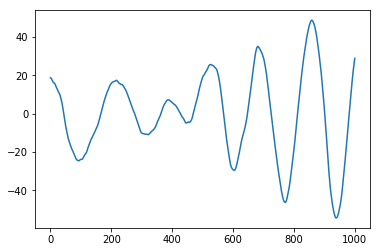

In [31]:
########## NOW WE ARE TESTING LORENTZIANS
#### I am going to use the parameters for c (8th March)
NoiseLC = load('Tests_LC.npy')
print(shape(NoiseLC))
figure()
plot(NoiseLC[0,:,0])
show()

In [32]:
J_LC,x_LC = SD_Test(NoiseLC[:,:,0],1)

Interpolation going on
Integration going on


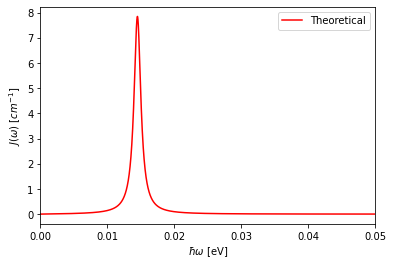

In [7]:
Gammak =  0.00062*2/hbar #9.4196*10**(-4) #rad/fs

#Putting Peaks together
def Lorentzian(ww):
    result = 0
    for i in range(1):
        result += (2*hbar/pi)*(Sk[i]*Wk[i]**3*ww*Gammak)/((Wk[i]**2-ww**2)**2+(ww**2*Gammak**2))
    return result

#array with all the frequencies and S
#Sk = array([0.003, 0.003])
#Wk = array([191,202])*1.23984*10**(-4)/hbar

#Sk = array([0.007, 0.018])
#Wk = array([568,770])*1.23984*10**(-4)/hbar

#14th of april
Sk = array([0.009])
Wk = array([117])*1.23984*10**(-4)/hbar



ww = linspace(0,2,100000)
Lorentz = Lorentzian(ww)

figure()
plot(ww*hbar,Lorentz/factor,'r',label='Theoretical')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-0.1,20*10**(-0))
xlim(0.00,0.05) 

legend()
show()

In [11]:
#JUNE 5TH, testing spectral densities
Noise3 = load('Noise_3.npy')

J_3,x_3= SD_Test(Noise3[:,:,0],1)

Calculating Autocorrelation
Interpolation going on
Integration going on
Finished


In [4]:
x_3 = np.load('X_3.npy')
J_3 = np.load('J_3.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'X_3.npy'

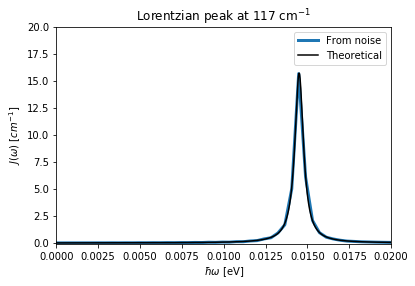

In [17]:
figure()
title('Lorentzian peak at 117 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
ylim(-0.1,20*10**(0))
xlim(0.00,0.02) 
plot(x_3,J_3,linewidth=3,label='From noise')
plot(ww*hbar,Lorentz/factor,'k',label='Theoretical')
legend()
show()

In [18]:
np.save('X_3',x_3) #SD for peak at 117 cm^-1 for comparison with Hannes on 5th of June
np.save('J_3',J_3) #Totaltime = 10,000 fs. dt = 1 fs. Reals = 1000. 

(1000, 1001, 2)


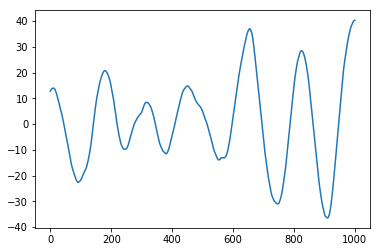

In [12]:
############ 14th of April
# testing for set of parameters Sk = 0.011 and Wk = 191 cm^-1

NoiseOneP_2 = load('One_Peak_Set2.npy')

print(shape(NoiseOneP_2))
figure()
plot(NoiseOneP_2[0,:,0])
show()

In [13]:
J_OP2,x_OP2 = SD_Test(NoiseOneP_2[:,:,0],1)

Interpolation going on
Integration going on


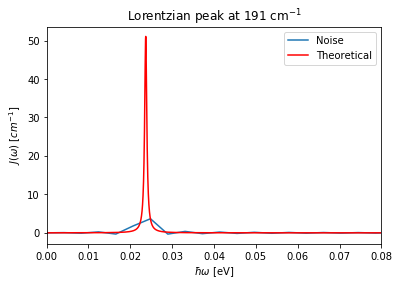

In [14]:
figure()
title('Lorentzian peak at 191 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-0.1,20*10**(-0))
xlim(0.000,0.08) 
plot(x_OP2,J_OP2,label='Noise')
plot(ww*hbar,Lorentz/factor,'r',label='Theoretical')
legend()
#savefig('Two_Peaks_SD_Lorentzian_C.jpg',bbox_inches='tight')
show()

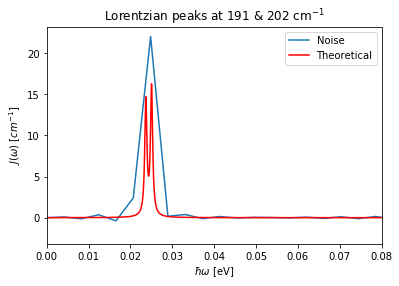

In [80]:
figure()
title('Lorentzian peaks at 191 & 202 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-0.1,20*10**(-0))
xlim(0.000,0.08) 
plot(x_LC,J_LC,label='Noise')
plot(ww*hbar,Lorentz/factor,'r',label='Theoretical')
legend()
savefig('Two_Peaks_SD_Lorentzian_C.jpg',bbox_inches='tight')
show()

(1000, 10001, 2)


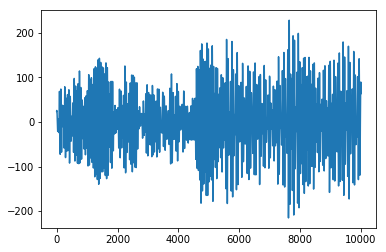

In [2]:
NoiseLF = load('Tests_LF.npy')
print(shape(NoiseLF))
figure()
plot(NoiseLF[0,:,0])
show()

In [3]:
J_LF,x_LF = SD_Test(NoiseLF[:,:,0],1) #mistake on labeling it should actually be H (9th of march)

Interpolation going on
Integration going on


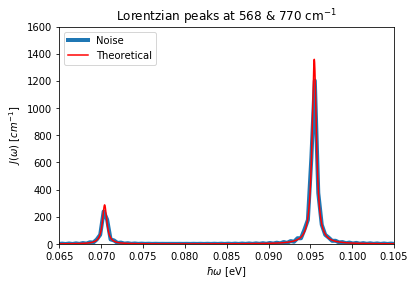

In [25]:
figure()
title('Lorentzian peaks at 568 & 770 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
ylim(-0.1,1600*10**(-0))
xlim(0.065,0.105) 
plot(x_LF,J_LF,linewidth=4,label='Noise')
plot(ww*hbar,Lorentz/factor,'r',label='Theoretical')
legend()
savefig('Two_Peaks_SD_Lorentzian_H.jpg',bbox_inches='tight')
show()

(1000, 5001, 2)


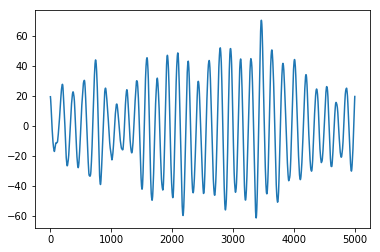

In [8]:
#15th April: Testing the peak for 191 cm^-1 (6th peak)

Noise191= load('Test_191_5000.npy')

print(shape(Noise191))
figure()
plot(Noise191[10,:,1])
show()

In [9]:
J_191,x_191 = SD_Test(Noise191[:,:,0],1)

Interpolation going on
Integration going on


In [16]:
J_191 = load('J_191.npy')
x_191 = load('X_191.npy')

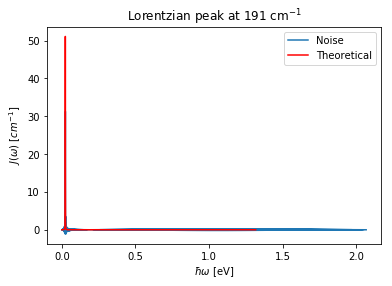

In [18]:
figure()
title('Lorentzian peak at 191 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-0.1,20*10**(-0))
#xlim(0.000,0.05) 
plot(x_191,J_191,label='Noise')
plot(ww*hbar,Lorentz/factor,'r',label='Theoretical')
legend()
show()

In [17]:
np.save('X_191',x_191)
np.save('J_191',J_191)

(1000, 5001, 2)


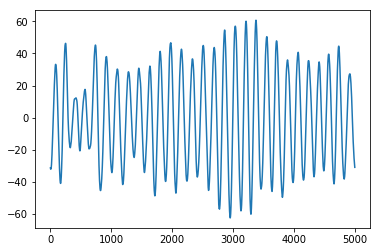

In [3]:
#16th of april: we are doing the same but without generating 3 x the length of the noise. Just once and using all
Noise191A= load('Test_191_5000_A.npy')

print(shape(Noise191A))
figure()
plot(Noise191A[10,:,1])
show()


In [4]:
J_191A,x_191A = SD_Test(Noise191A[:,:,0],1)

Interpolation going on
Integration going on


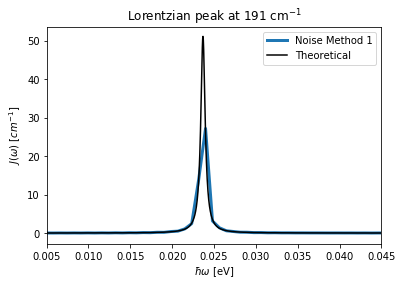

In [42]:
#Method 1: real*site x N
#Method 2: real*site x N*f, where f = 3 four our case
figure()
title('Lorentzian peak at 191 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-0.1,20*10**(-1))
xlim(0.005,0.045) 
#plot(x_191,J_191,linewidth=3,label='Noise Method 2')
plot(x_191A,J_191A,linewidth=3,label='Noise Method 1')
plot(ww*hbar,Lorentz/factor,'k',label='Theoretical')
legend()
show()

(1000, 10001, 2)


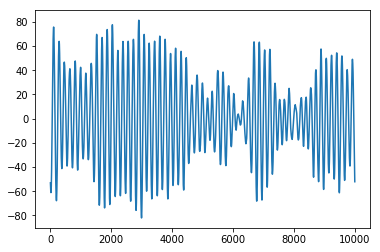

In [43]:
Noise191A_10= load('Test_191_10000_A.npy')

print(shape(Noise191A_10))
figure()
plot(Noise191A_10[0,:,1])
show()

In [44]:
J_191A_10,x_191A_10 = SD_Test(Noise191A_10[:,:,0],1)

Interpolation going on
Integration going on


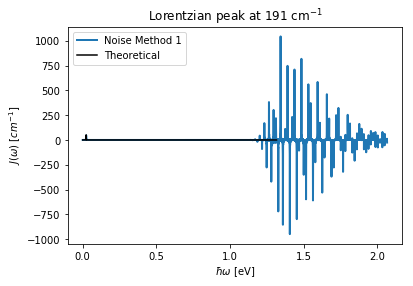

In [56]:
figure()
title('Lorentzian peak at 191 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')
#ylim(-1,52*10**(-0))
#xlim(0.005,0.040) 
#plot(x_191,J_191,linewidth=3,label='Noise Method 2')
plot(x_191A_10,J_191A_10,linewidth=2,label='Noise Method 1')
plot(ww*hbar,Lorentz/factor,'k',label='Theoretical')
legend()
show()

In [57]:
np.save('X_191_10',x_191A_10)#both of these for total time = 10,000 fs
np.save('J_191_10',J_191A_10) #and method A (1)
np.save('X_191_A',x_191A) #both for total time = 5000 fs
np.save('J_191_A',J_191A)#abd method A(1)

(2000, 10001, 2)


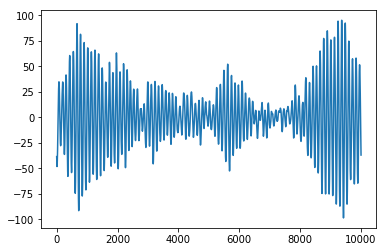

In [5]:
#28th of April

Noise_10 = load('PD_test_10_noise.npy')

print(shape(Noise_10))
figure()
plot(Noise_10[0,:,0])
show()

In [7]:
J_10,x_10 = SD_Test(Noise_10[:,:,0],1)

Calculating Autocorrelation
Interpolation going on
Integration going on


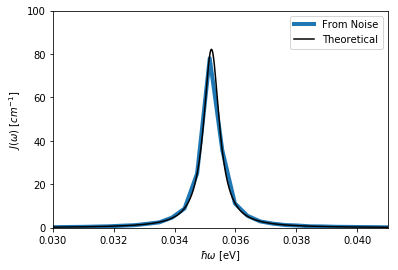

In [18]:
figure()
#title('Lorentzian peak at 191 cm$^{-1}$')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')

plot(x_10,J_10,linewidth=4,label='From Noise')
plot(ww*hbar,Lorentz/factor,'k',label='Theoretical')
ylim(-0.1,10*10**(1))
xlim(0.03,0.041) 
legend()
show()

In [19]:
np.save('X_10',x_10) #SD for peak #10 in Lorentzian data
np.save('J_10',J_10) #Totaltime = 10,000 fs. dt = 1 fs. Reals = 2000. 

(2000, 10001, 2)


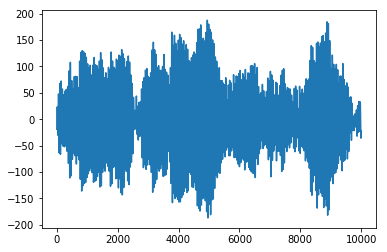

In [20]:
#28th of april (part 2)
#plotting SD for peak 32
Noise_32 = load('PD_test_32_noise.npy')

print(shape(Noise_32))
figure()
plot(Noise_32[0,:,0])
show()

In [21]:
J_32,x_32 = SD_Test(Noise_32[:,:,0],1)

Calculating Autocorrelation
Interpolation going on
Integration going on


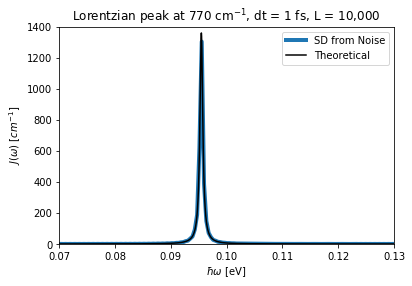

In [32]:
figure()
title('Lorentzian peak at 770 cm$^{-1}$, dt = 1 fs, L = 10,000')
xlabel('$\hbar\omega$ [eV]')
ylabel('$J(\omega)$ [$cm^{-1}$]')

plot(x_32,J_32,linewidth=4,label='SD from Noise')
plot(ww*hbar,Lorentz/factor,'k',label='Theoretical')
ylim(-0.1,14*10**(2))
xlim(0.07,0.13) 
legend()
show()

In [33]:
np.save('X_32',x_32) #SD for peak #32 in Lorentzian data
np.save('J_32',J_32) #Totaltime = 10,000 fs. dt = 1 fs. Reals = 2000. 

(1000, 10001, 2)


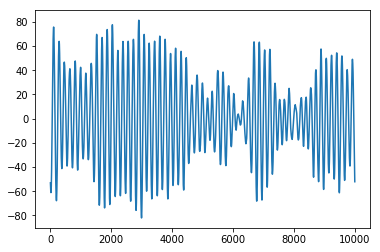

In [2]:
#Tests from 20/4/21
# I am trying to see how changing the noise affects the autocorrelation

Noise191A_10= load('Test_191_10000_A.npy')

print(shape(Noise191A_10))
figure()
plot(Noise191A_10[0,:,1])
show()

In [5]:
#This first test (A) will be:
# We are using all the noise for the calculation of C(t) 
# And then we just simply take half of the values C[N//2]

C_A = SD_Test(Noise191A_10[:,:,0],1)

Calculating Autocorrelation
Interpolation going on
Integration going on


(10001,)


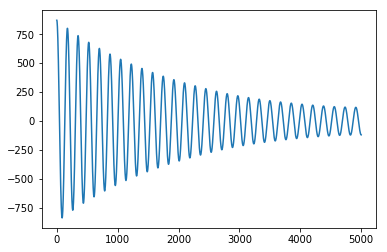

In [9]:
print(shape(C_A))
N_A = len(C_A)
figure()
plot(C_A[0:N_A//2])
show()

In [11]:
C_B = SD_Test(Noise191A_10[:,:N_A//2,0],1)

Calculating Autocorrelation
Interpolation going on
Integration going on


(5000,)


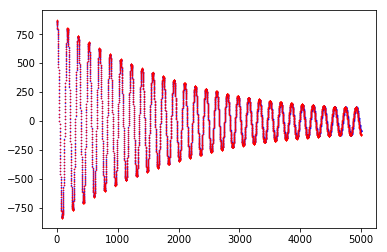

In [17]:
print(shape(C_B))
N_B = len(C_B)
figure()
plot(C_B,'bo',markersize=0.5)
plot(C_A[0:N_A//2],'ro',markersize=0.5)
show()

In [ ]:
#20th April: Results from comparing the Autocorrelation shows that they produce exactly the same result...